# H1N1 vaccine classification

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
pd.set_option('display.max_columns', None)

In [291]:
data = pd.read_csv('h1N1_VACCINE.csv')
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [292]:
data.shape

(26707, 34)

In [293]:
data.size

908038

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [295]:
data.nunique()

unique_id                    26707
h1n1_worry                       4
h1n1_awareness                   3
antiviral_medication             2
contact_avoidance                2
bought_face_mask                 2
wash_hands_frequently            2
avoid_large_gatherings           2
reduced_outside_home_cont        2
avoid_touch_face                 2
dr_recc_h1n1_vacc                2
dr_recc_seasonal_vacc            2
chronic_medic_condition          2
cont_child_undr_6_mnths          2
is_health_worker                 2
has_health_insur                 2
is_h1n1_vacc_effective           5
is_h1n1_risky                    5
sick_from_h1n1_vacc              5
is_seas_vacc_effective           5
is_seas_risky                    5
sick_from_seas_vacc              5
age_bracket                      5
qualification                    4
race                             4
sex                              2
income_level                     3
marital_status                   2
housing_status      

In [296]:
## we see we have 26707 unique patiets data that has been collected

In [297]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

#### THINGS TO DEAL IN THIS DATA
2. missing values
3. chategorical main ordinal and nominal data
4. skewness

In [298]:
data.drop('unique_id', axis = 1, inplace = True)

In [299]:
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [300]:
# col_to_convert = data.iloc[:,::]

In [301]:
# data[] = data.astype(object)
# data.info()

In [302]:
data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [303]:
## out of 32 columns, only 5 columns do not have missing values
## there are around 27 columns which have missing data and need to be handled

In [304]:
data.head(3)


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0


In [305]:
# has_health insur has more thna 50% data missing from the columns, hence dropping this
data.drop('has_health_insur', axis = 1, inplace = True)

In [306]:
data.shape

(26707, 32)

In [307]:
## create a list of variables with data less than 150 observaions
data_drop_list = []
data_big = []
for i in data:
    if data[i].isnull().sum() > 0 and data[i].isnull().sum() < 600:
        data_drop_list.append(i)
    elif data[i].isnull().sum() > 600:
        data_big.append(i)

data_drop_list

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [308]:
data.dropna(subset = data_drop_list,inplace = True)

In [309]:
data.shape

(25238, 32)

In [310]:
del_obs = 26707 - data.shape[0]
## we have removed 960 data observations
## which is only 3-4% of data of observation

In [311]:
# 5% obs removed from data
del_obs*100/26707

5.500430598719437

In [312]:
data.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc            1869
dr_recc_seasonal_vacc        1869
chronic_medic_condition       368
cont_child_undr_6_mnths       202
is_health_worker              197
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                 739
race                            0
sex                             0
income_level                 3548
marital_status                746
housing_status               1341
employment                    794
census_msa                      0
no_of_adults  

In [313]:
data[data_big].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25238 entries, 0 to 26706
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dr_recc_h1n1_vacc        23369 non-null  float64
 1   dr_recc_seasonal_vacc    23369 non-null  float64
 2   chronic_medic_condition  24870 non-null  float64
 3   cont_child_undr_6_mnths  25036 non-null  float64
 4   is_health_worker         25041 non-null  float64
 5   qualification            24499 non-null  object 
 6   income_level             21690 non-null  object 
 7   marital_status           24492 non-null  object 
 8   housing_status           23897 non-null  object 
 9   employment               24444 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.1+ MB


In [314]:
data['dr_recc_h1n1_vacc'].dtypes

dtype('float64')

In [315]:
data.fillna(0,inplace = True)
data.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [316]:
data.shape

(25238, 32)

- h1n1_worry                      92 ---done
- h1n1_awareness                 116 ---done
- antiviral_medication            71 ---done
- contact_avoidance              208 ----done
- bought_face_mask                19 ---done
- wash_hands_frequently           42 ---done
- avoid_large_gatherings          87 ---done
- reduced_outside_home_cont       82 ---done
- avoid_touch_face               128 ---done
- dr_recc_h1n1_vacc             2160
- dr_recc_seasonal_vacc         2160
- chronic_medic_condition        971
- cont_child_undr_6_mnths        820
- is_health_worker               804
- has_health_insur             12274 ----done
- is_h1n1_vacc_effective         391
- is_h1n1_risky                  388
- sick_from_h1n1_vacc            395
- is_seas_vacc_effective         462
- is_seas_risky                  514
- sick_from_seas_vacc            537
- age_bracket                      0 ----done
- qualification                 1407
- race                             0 ----done
- sex                              0 ----done
- income_level                  4423
- marital_status                1408
- housing_status                2042
- employment                    1463
- census_msa                       0 ----done
- no_of_adults                   249 ----done
- no_of_children                 249 ----done
- h1n1_vaccine                     0 ----done

In [317]:
data[data_big].head()

,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,qualification,income_level,marital_status,housing_status,employment
0,0.0,0.0,0.0,0.0,0.0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force
1,0.0,0.0,0.0,0.0,0.0,12 Years,Below Poverty,Not Married,Rent,Employed
2,0.0,0.0,1.0,0.0,0.0,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed
3,0.0,1.0,1.0,0.0,0.0,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force
4,0.0,0.0,0.0,0.0,0.0,Some College,"<= $75,000, Above Poverty",Married,Own,Employed


## CHATERGORICAL COLUMN DEALING

1. ordinal = mapping
2. nominal = sparse

In [318]:
data.nunique()


h1n1_worry                   4
h1n1_awareness               3
antiviral_medication         2
contact_avoidance            2
bought_face_mask             2
wash_hands_frequently        2
avoid_large_gatherings       2
reduced_outside_home_cont    2
avoid_touch_face             2
dr_recc_h1n1_vacc            2
dr_recc_seasonal_vacc        2
chronic_medic_condition      2
cont_child_undr_6_mnths      2
is_health_worker             2
is_h1n1_vacc_effective       5
is_h1n1_risky                5
sick_from_h1n1_vacc          5
is_seas_vacc_effective       5
is_seas_risky                5
sick_from_seas_vacc          5
age_bracket                  5
qualification                5
race                         4
sex                          2
income_level                 4
marital_status               3
housing_status               3
employment                   4
census_msa                   3
no_of_adults                 4
no_of_children               4
h1n1_vaccine                 2
dtype: i

In [319]:
nom_data =['race', 'sex','marital_status', 'housing_status', 'employment', 'census_msa']

In [320]:
data_new = pd.get_dummies(data[nom_data], drop_first=True)

In [321]:
data.shape

(25238, 32)

In [322]:
data = data.drop(nom_data, axis = 1)

In [323]:
data = pd.concat([data,data_new], axis =1)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Below Poverty,0.0,0.0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,Below Poverty,0.0,0.0,0,0,0,1,1,0,1,0,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",2.0,0.0,0,0,0,1,1,0,1,1,0,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,Below Poverty,0.0,0.0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,"<= $75,000, Above Poverty",1.0,0.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0


In [324]:
data.shape

(25238, 39)

In [325]:
data['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', 0],
      dtype=object)

In [326]:
data['income_level'], c = pd.factorize(data['income_level'])
data['age_bracket'], c = pd.factorize(data['age_bracket'])
data['qualification'], c = pd.factorize(data['qualification'])
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0.0,0.0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,0.0,0.0,0,0,0,1,1,0,1,0,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,1,2.0,0.0,0,0,0,1,1,0,1,1,0,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0.0,0.0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,1,1.0,0.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0


In [327]:
data.shape

(25238, 39)

In [328]:
data1 = data['h1n1_vaccine']

In [329]:
data.drop('h1n1_vaccine', axis = 1, inplace = True)
data = pd.concat([data,data1], axis = 1)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,no_of_adults,no_of_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0.0,0.0,0,0,1,0,0,1,1,0,0,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,0.0,0.0,0,0,1,1,0,1,0,1,1,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,1,2.0,0.0,0,0,1,1,0,1,1,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0.0,0.0,0,0,1,0,0,1,0,1,0,1,0,1,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,1,1.0,0.0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


### OUTLIERS

<AxesSubplot:>

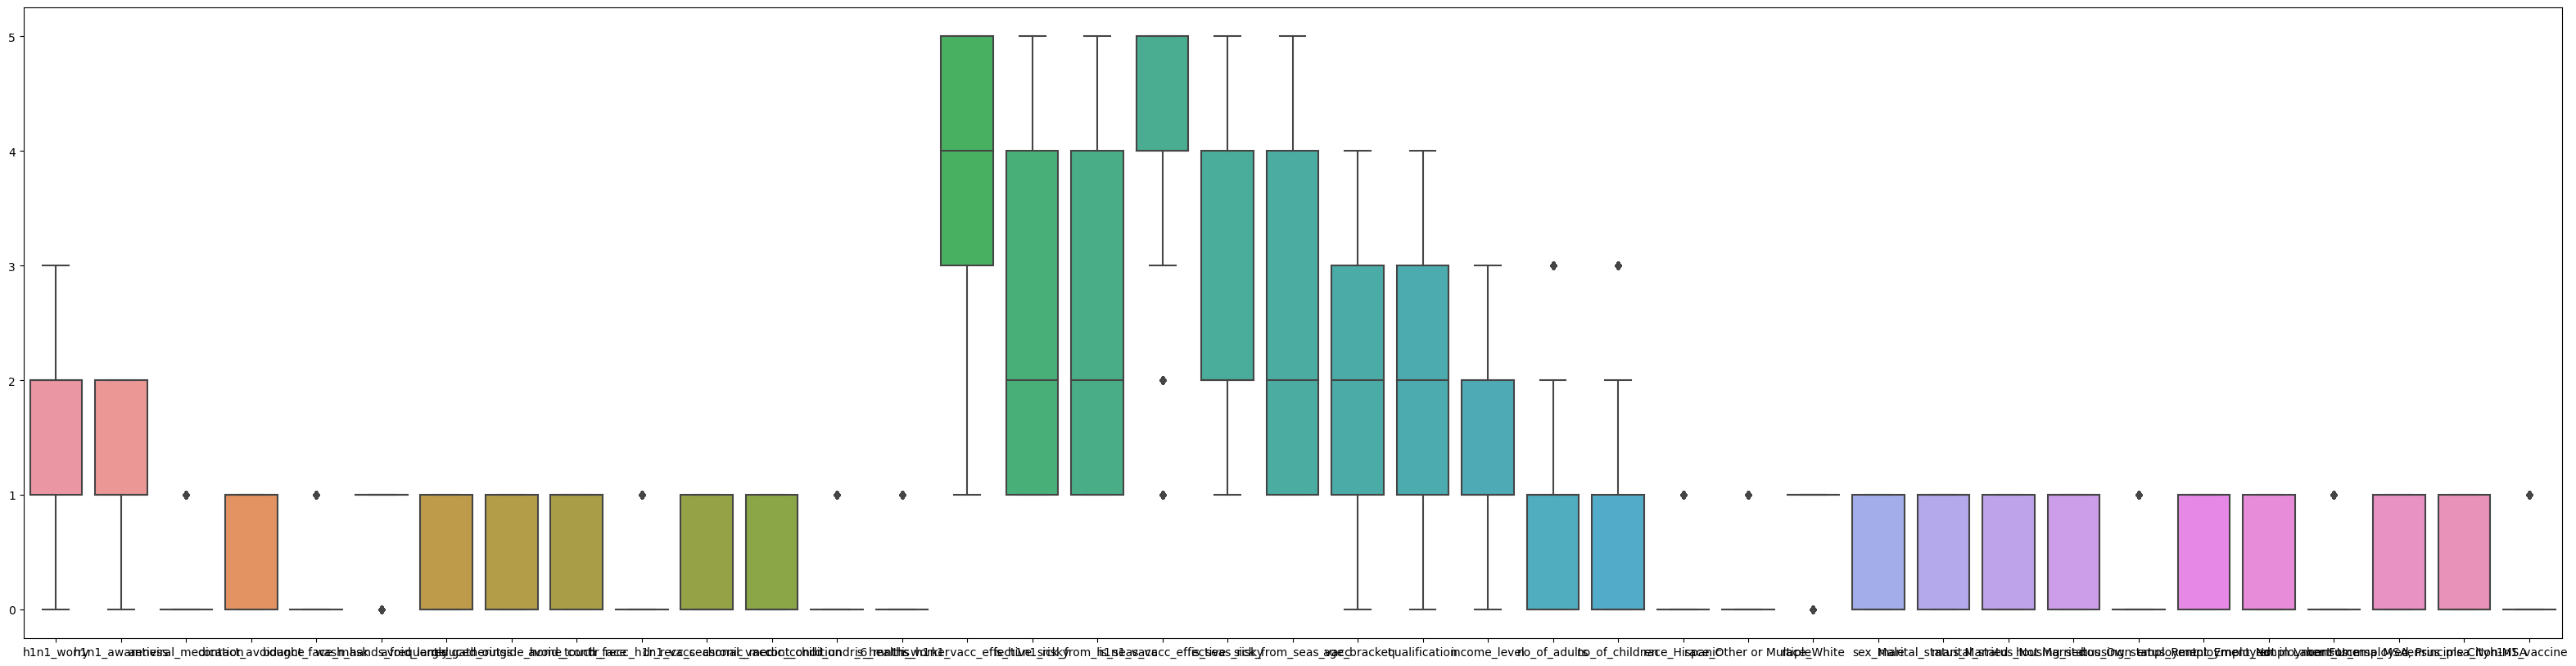

In [330]:
plt.figure(figsize = (40,10))
sns.boxplot(data = data)

In [331]:
for cols in data.columns[1:]:
    if data[cols].dtype == object:
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        
        data.loc[(data[cols]<low) | (data[cols]>high),cols] = data[cols].mean()

<AxesSubplot:>

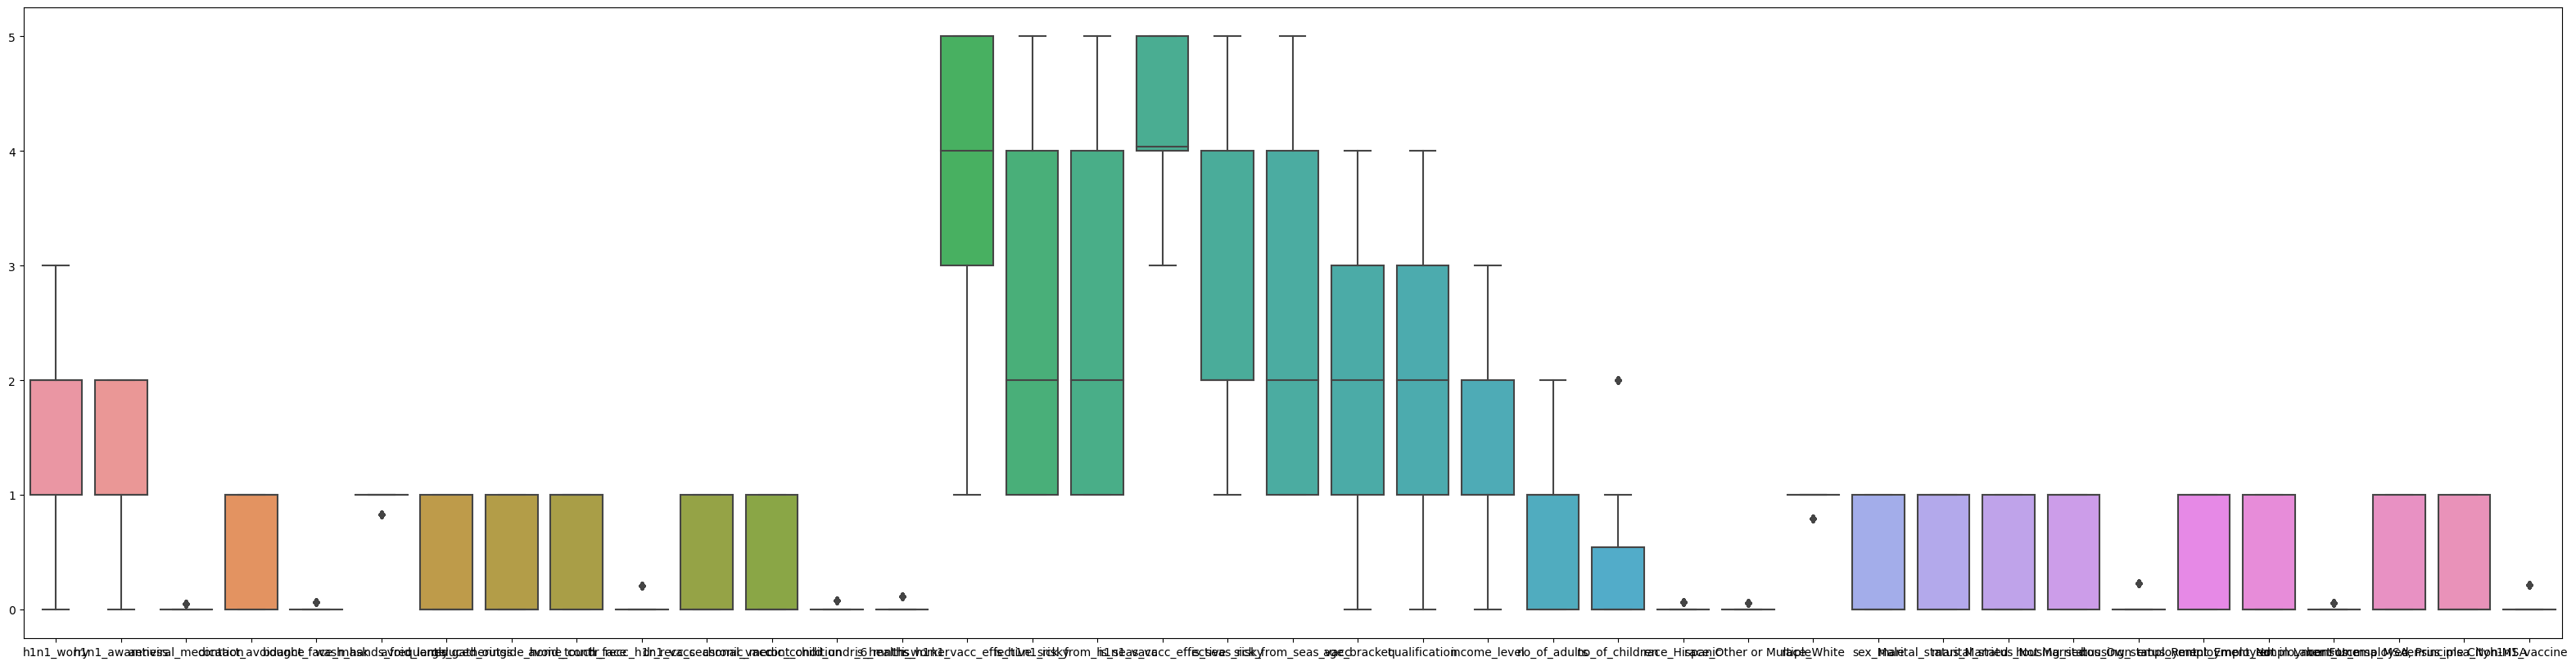

In [332]:
plt.figure(figsize = (40,10))
sns.boxplot(data = data)

You can see outliers have reduced and some have been even cleared out

## FEATURE SELECTION

In [333]:
x = data.iloc[:,:35]
y = data.iloc[:,-1]

### BALANCING DATA

In [334]:
y.value_counts()

0.000000    19842
0.213805     5396
Name: h1n1_vaccine, dtype: int64

In [335]:
from collections import Counter
from sklearn.datasets import make_classification

In [336]:
x,y = make_classification(n_samples = 10000, n_features = 2, n_redundant =0, n_clusters_per_class = 1,
                          weights=[0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [337]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [338]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


###  STANDARDIZING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
print(scaled)

### BIFIRCATING DATA TO TEST AND TRAIN

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(scaled,y,test_size = 0.2, random_state =42)

### FITTING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 42, solver='lbfgs')
LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

LR.score(x_train,y_train)

In [ ]:
LR.score(x_test,y_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 100, penalty = 'l2')

logreg.fit(x_train,y_train)

# predict set
y_pred = logreg.predict(x_test)

logreg.score(x_train,y_train)

In [ ]:
logreg.score(x_test,y_test)

In [ ]:
## metrics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state=42), {
    'C': [1,10,20],
    'solver':['sag','lbfgs']
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
New_LR = LogisticRegression(C= 10, solver='sag')
New_LR.fit(x_train,y_train)
New_LR.score(x_test,y_test)

In [ ]:
New_LR.score(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#### HERE we are seeing a case of overfitting, hence we try to apply random forst and descion tree algorithms and accordingly find the best algorithm

### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x,y)
y_pred =clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_true=y_train, y_pred=clf.predict(x_train))
accuracy_train   

In [ ]:
accuracy_test = accuracy_score(y_true=y_test, y_pred=clf.predict(x_test))
accuracy_test 

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
cm

### RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

### XG BOOST 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


## AS WE CAN SEE HERE:
   #### AMONGST THE 4 MODEL USED
    1. Logistic Regression
    2. Decision Tree Classifier
    3. Random Forest Classifier
    4. Xtreme Gradient Boosting CLassifier
    
   **RANDOM FOREST CLASSIFIER IS THE BEST MODEL**""
    

## This model can be beneficial and further used for:

-  Public Health Impact: Identifies key factors influencing H1N1 vaccination and helps improve awareness campaigns.

-  Better Vaccination Strategies: Assists governments and healthcare providers in predicting vaccine hesitancy and optimizing resource allocation.

-  Research & Analytics: Supports epidemiologists, NGOs, and insurance companies in making data-driven healthcare decisions.